## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
    if z > epsilon:
        state_Q1 = Q_state(state)
        action = max(Q_dict[state_Q1],key=Q_dict[state_Q1].get)  
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]
    
    return action


#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,7)),('x-3-x-x-x-8-x-x-x',(7,5)),
                        ('x-x-x-x-x-x-x-x-x',(4,9)),('x-2-6-3-x-x-5-x-x',(1,9)),
                        ('6-x-x-x-5-x-x-x-x',(8,1)),('x-x-x-x-7-x-8-x-x',(5,3))]    # selecting random 6 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [11]:
# these are my final parameters
EPISODES = 5000000          # number of episodes
LR = 0.01                   # learning rate
GAMMA = 0.10                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001          # epsilon decay rate
threshold = 2000            # no of episodes after which states_tracked wwill be saved

### Q-update loop ---write your code here

In [12]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()
    curr_state = env.state
    done = False
    add_to_dict(curr_state)

    while done != True:
        # getting the q values for the current state
        curr_state_Q1 = Q_state(curr_state)
        # getitng an action that can be performed using epsilon greedy
        curr_action = epsilon_greedy(curr_state, episode)
        # perform a step to get the reward, next state and board result for completion
        next_state, reward, done = env.step(curr_state, curr_action)
        # next state
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        if done != True:
            # getting arg max of the next actions
            max_next = max(Q_dict[next_state_temp], key = Q_dict[next_state_temp].get)
            Q_dict[curr_state_Q1][curr_action] += LR * ((reward + (GAMMA * (Q_dict[next_state_temp][max_next]))) - Q_dict[curr_state_Q1][curr_action] ) 
        else:
            # this is the last state - calculating end result
            Q_dict[curr_state_Q1][curr_action] += LR * ((reward - Q_dict[curr_state_Q1][curr_action]))

        curr_state = next_state

    # check if the episode reached threshold 
    if ((episode + 1) % threshold) == 0:
        # saving the states
        save_tracking_states()

elapsed_time = time.time() - start_time
# saving the states tracked
save_obj(States_track,'States_tracked')
# saving the Q_dict
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [13]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0754423803453488,
              (0, 3): -1.075015014030659,
              (0, 5): -1.074370759789828,
              (0, 7): -1.075588724736217,
              (0, 9): -1.074902829931414,
              (1, 1): -1.019133819405374,
              (1, 3): -1.0753634852229426,
              (1, 5): -1.0746413031834485,
              (1, 7): -1.0756632653395424,
              (1, 9): -1.075370559847764,
              (2, 1): -1.074912710261939,
              (2, 3): -1.0746018566138558,
              (2, 5): -1.074752339048643,
              (2, 7): -1.075252360687694,
              (2, 9): -1.0742374810595314,
              (3, 1): -1.0746631773949404,
              (3, 3): -1.074968898664238,
              (3, 5): -1.074588396155716,
              (3, 7): -1.0746204409860367,
              (3, 9): -1.0746053723545141,
              (4, 1): -1.0746206007052677,
              (4, 3): -1.075204575305507,
              (4, 5): -1.07

In [14]:
# printing length of q dict
len(Q_dict)

2890240

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [16]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(close=None, block=None)>

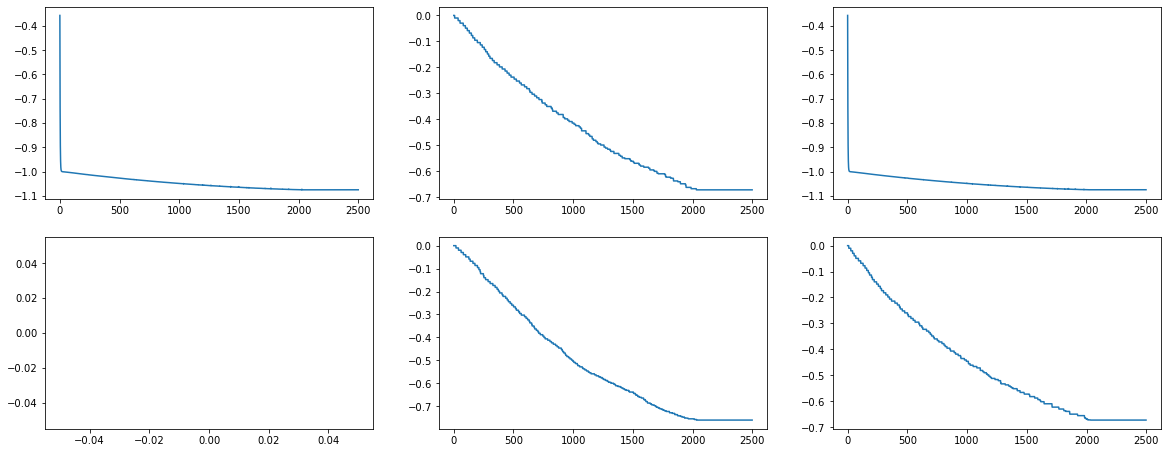

In [17]:
plt.figure(0, figsize=(20,12))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,7)])))
plt.subplot(331)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-x-8-x-x-x'][(7,5)])))
plt.subplot(332)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-x-8-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(4,9)])))
plt.subplot(333)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(4,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-2-6-3-x-x-5-x-x'][(1,9)])))
plt.subplot(334)
plt.plot(x_axis,np.asarray(States_track['x-2-6-3-x-x-5-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['6-x-x-x-5-x-x-x-x'][(8,1)])))
plt.subplot(335)
plt.plot(x_axis,np.asarray(States_track['6-x-x-x-5-x-x-x-x'][(8,1)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-7-x-8-x-x'][(5,3)])))
plt.subplot(336)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-7-x-8-x-x'][(5,3)]))
plt.show

### Epsilon - decay check

In [18]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

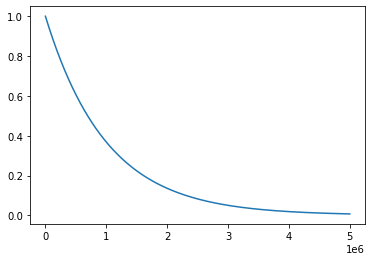

In [19]:
plt.plot(time, epsilon)
plt.show()

### From this we can see that the Q-values are converging